In [66]:
# calling all the required library for some basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab


### loading the dataset

In [54]:
# loading the dataset:
df = pd.read_csv('data/Gold.csv',dtype={'Price': 'float64', 'Open': 'float64'})

df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2022",1949.2,1933.5,1949.9,1919.1,3.62K,0.81%
1,"Mar 30, 2022",1933.5,1918.4,1937.0,1914.5,17.77K,1.11%
2,"Mar 29, 2022",1912.2,1922.4,1929.4,1888.3,128.05K,-1.42%
3,"Mar 28, 2022",1939.8,1958.7,1959.8,1915.7,181.37K,-0.74%
4,"Mar 25, 2022",1954.2,1957.8,1965.1,1942.6,147.90K,-0.41%


### basic EDA

In [55]:
# to check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4929 non-null   object 
 1   Price     4929 non-null   float64
 2   Open      4929 non-null   float64
 3   High      4929 non-null   float64
 4   Low       4929 non-null   float64
 5   Vol.      4929 non-null   object 
 6   Change %  4929 non-null   object 
dtypes: float64(4), object(3)
memory usage: 269.7+ KB


In [56]:
# converting date col to datetime format with year_first
df['Date'] = pd.to_datetime(df['Date'], yearfirst= True)


In [57]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-03-31,1949.2,1933.5,1949.9,1919.1,3.62K,0.81%
1,2022-03-30,1933.5,1918.4,1937.0,1914.5,17.77K,1.11%
2,2022-03-29,1912.2,1922.4,1929.4,1888.3,128.05K,-1.42%
3,2022-03-28,1939.8,1958.7,1959.8,1915.7,181.37K,-0.74%
4,2022-03-25,1954.2,1957.8,1965.1,1942.6,147.90K,-0.41%


In [60]:
# checking null values!
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [64]:
# basic stats on the dataset
df.describe()

,Price,Open,High,Low
count,4929.000000,4929.000000,4929.000000,4929.000000
mean,1171.102195,1166.980558,1171.299519,1162.275173
std,459.907207,458.069703,459.852930,456.111211
min,321.500000,321.000000,323.500000,319.300000
25%,788.300000,792.900000,797.600000,783.100000
50%,1290.900000,1282.700000,1284.800000,1280.900000
75%,1468.100000,1460.100000,1465.500000,1453.900000
max,2117.100000,2121.700000,2121.700000,2121.700000


In [62]:
 df.to_csv('data/Gold_data.csv', index=False)

### Plotting the time-series data

Text(0, 0.5, 'Gold Closing Price')

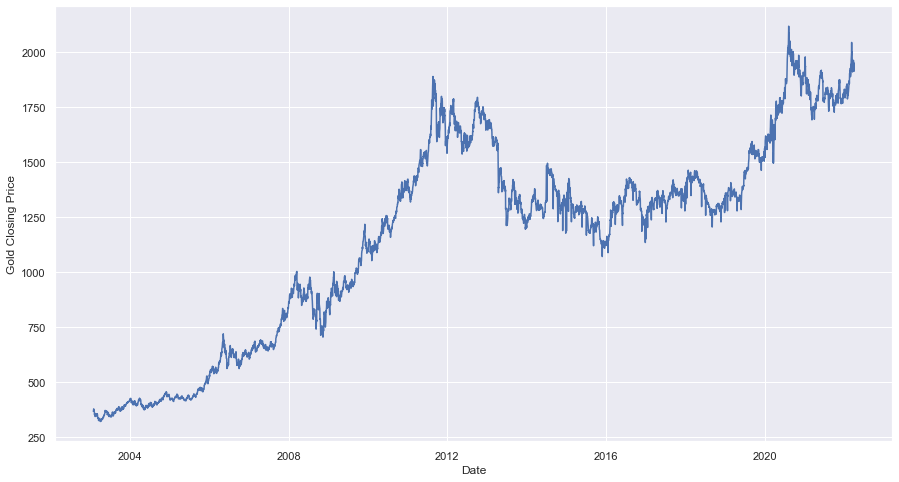

In [65]:
sns.set_theme(context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = df['Date'], y = df['Price'] , ax =ax)
plt.ylabel('Gold Closing Price')

### QQ Plot

#### QQ plot is used to determine whether a data set is distributed a certain way or it showcases how the data fits a Normal Distribution!

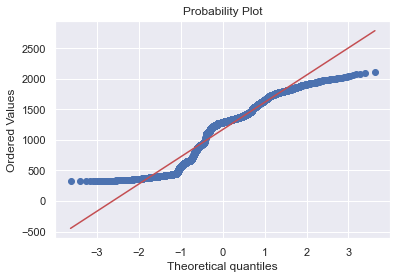

In [67]:
scipy.stats.probplot(df.Price, plot = pylab)
pylab.show()

the y axis is the price of the gold arranged in ascending order and the x axis is the theoretical quantiles of the dataset in other words how many standard deviations the values are away from the mean. The red diagonal line indicates the trend the price to follow for it to be normally distributed, but from the above plot its clearly seen that it doe not follow the red line as we see we have more values aroun 400-500 price range than it should!